# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
def foo(): pass

## Imports

In [ ]:
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_format = 'retina'
%load_ext rich
import datetime
import hashlib
import json
import os
import re
import sys
import time
import warnings

import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm
from ydata_profiling import ProfileReport

register_matplotlib_converters()
sns.set()
sns.set_context("notebook")
plt.rcParams["figure.figsize"] = 10, 6
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 4
warnings.simplefilter(action="ignore", category=FutureWarning)

dollar_formatter = FuncFormatter(lambda x, pos: f"${x:,.0f}")
thousands_formatter = FuncFormatter(lambda x, pos: f"{x:,.0f}")

## Functions

In [ ]:
def raw_to_cleaned_canada(df_):
    return (
        df_
        .assign(yearmonth=pd.to_datetime(df_[['year', 'month']].assign(day=1)))
        
    )

clean_canada_births = raw_to_cleaned_canada(canada_births_1991_2022)
clean_canada_births.head()

def raw_to_cleaned_nhl_player_births(df_):
    return(
        df_.assign(birth_date=pd.to_datetime(df_['birth_date']))
    )

clean_nhl_player_births = raw_to_cleaned_nhl_player_births(nhl_player_births)
clean_nhl_player_births.head()

,player_id,first_name,last_name,birth_date,birth_city,birth_country,birth_state_province,birth_year,birth_month
0,8467867,Bryan,Adams,1977-03-20,Fort St. James,CAN,British Columbia,1977,3
1,8445176,Donald,Audette,1969-09-23,Laval,CAN,Quebec,1969,9
2,8460014,Eric,Bertrand,1975-04-16,St-Ephrem,CAN,Quebec,1975,4
3,8460510,Jason,Botterill,1976-05-19,Edmonton,CAN,Alberta,1976,5
4,8459596,Andrew,Brunette,1973-08-24,Sudbury,CAN,Ontario,1973,8


In [ ]:
clean_nhl_player_births.dtypes


player_id                        int64
first_name                      object
last_name                       object
birth_date              datetime64[ns]
birth_city                      object
birth_country                   object
birth_state_province            object
birth_year                       int64
birth_month                      int64
dtype: object

## Data

In [ ]:
canada_births_1991_2022 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-09/canada_births_1991_2022.csv')
nhl_player_births = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-09/nhl_player_births.csv')
nhl_rosters = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-09/nhl_rosters.csv')
nhl_teams = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-09/nhl_teams.csv')

In [ ]:
canada_births_1991_2022.head()

,year,month,births
0,1991,1,32213
1,1991,2,30345
2,1991,3,34869
3,1991,4,35398
4,1991,5,36371


In [ ]:
nhl_player_births.head()

,player_id,first_name,last_name,birth_date,birth_city,birth_country,birth_state_province,birth_year,birth_month
0,8467867,Bryan,Adams,1977-03-20,Fort St. James,CAN,British Columbia,1977,3
1,8445176,Donald,Audette,1969-09-23,Laval,CAN,Quebec,1969,9
2,8460014,Eric,Bertrand,1975-04-16,St-Ephrem,CAN,Quebec,1975,4
3,8460510,Jason,Botterill,1976-05-19,Edmonton,CAN,Alberta,1976,5
4,8459596,Andrew,Brunette,1973-08-24,Sudbury,CAN,Ontario,1973,8


In [ ]:
nhl_player_births.dtypes


player_id                int64
first_name              object
last_name               object
birth_date              object
birth_city              object
birth_country           object
birth_state_province    object
birth_year               int64
birth_month              int64
dtype: object

In [ ]:
nhl_rosters.head()

,team_code,season,position_type,player_id,headshot,first_name,last_name,sweater_number,position_code,shoots_catches,height_in_inches,weight_in_pounds,height_in_centimeters,weight_in_kilograms,birth_date,birth_city,birth_country,birth_state_province
0,ATL,19992000,forwards,8467867,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Bryan,Adams,26.0,L,L,72.0,185.0,183.0,84.0,1977-03-20,Fort St. James,CAN,British Columbia
1,ATL,19992000,forwards,8445176,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Donald,Audette,28.0,R,R,68.0,191.0,173.0,87.0,1969-09-23,Laval,CAN,Quebec
2,ATL,19992000,forwards,8460014,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Eric,Bertrand,83.0,L,L,73.0,205.0,185.0,93.0,1975-04-16,St-Ephrem,CAN,Quebec
3,ATL,19992000,forwards,8460510,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Jason,Botterill,28.0,L,L,76.0,217.0,193.0,98.0,1976-05-19,Edmonton,CAN,Alberta
4,ATL,19992000,forwards,8459596,https://assets.nhle.com/mugs/nhl/19992000/ATL/...,Andrew,Brunette,15.0,L,L,73.0,215.0,185.0,98.0,1973-08-24,Sudbury,CAN,Ontario


## EDA

In [ ]:
# config_minimal.yaml

## Plots

### What does the birth rate for Canadians look like (agg monthly)?

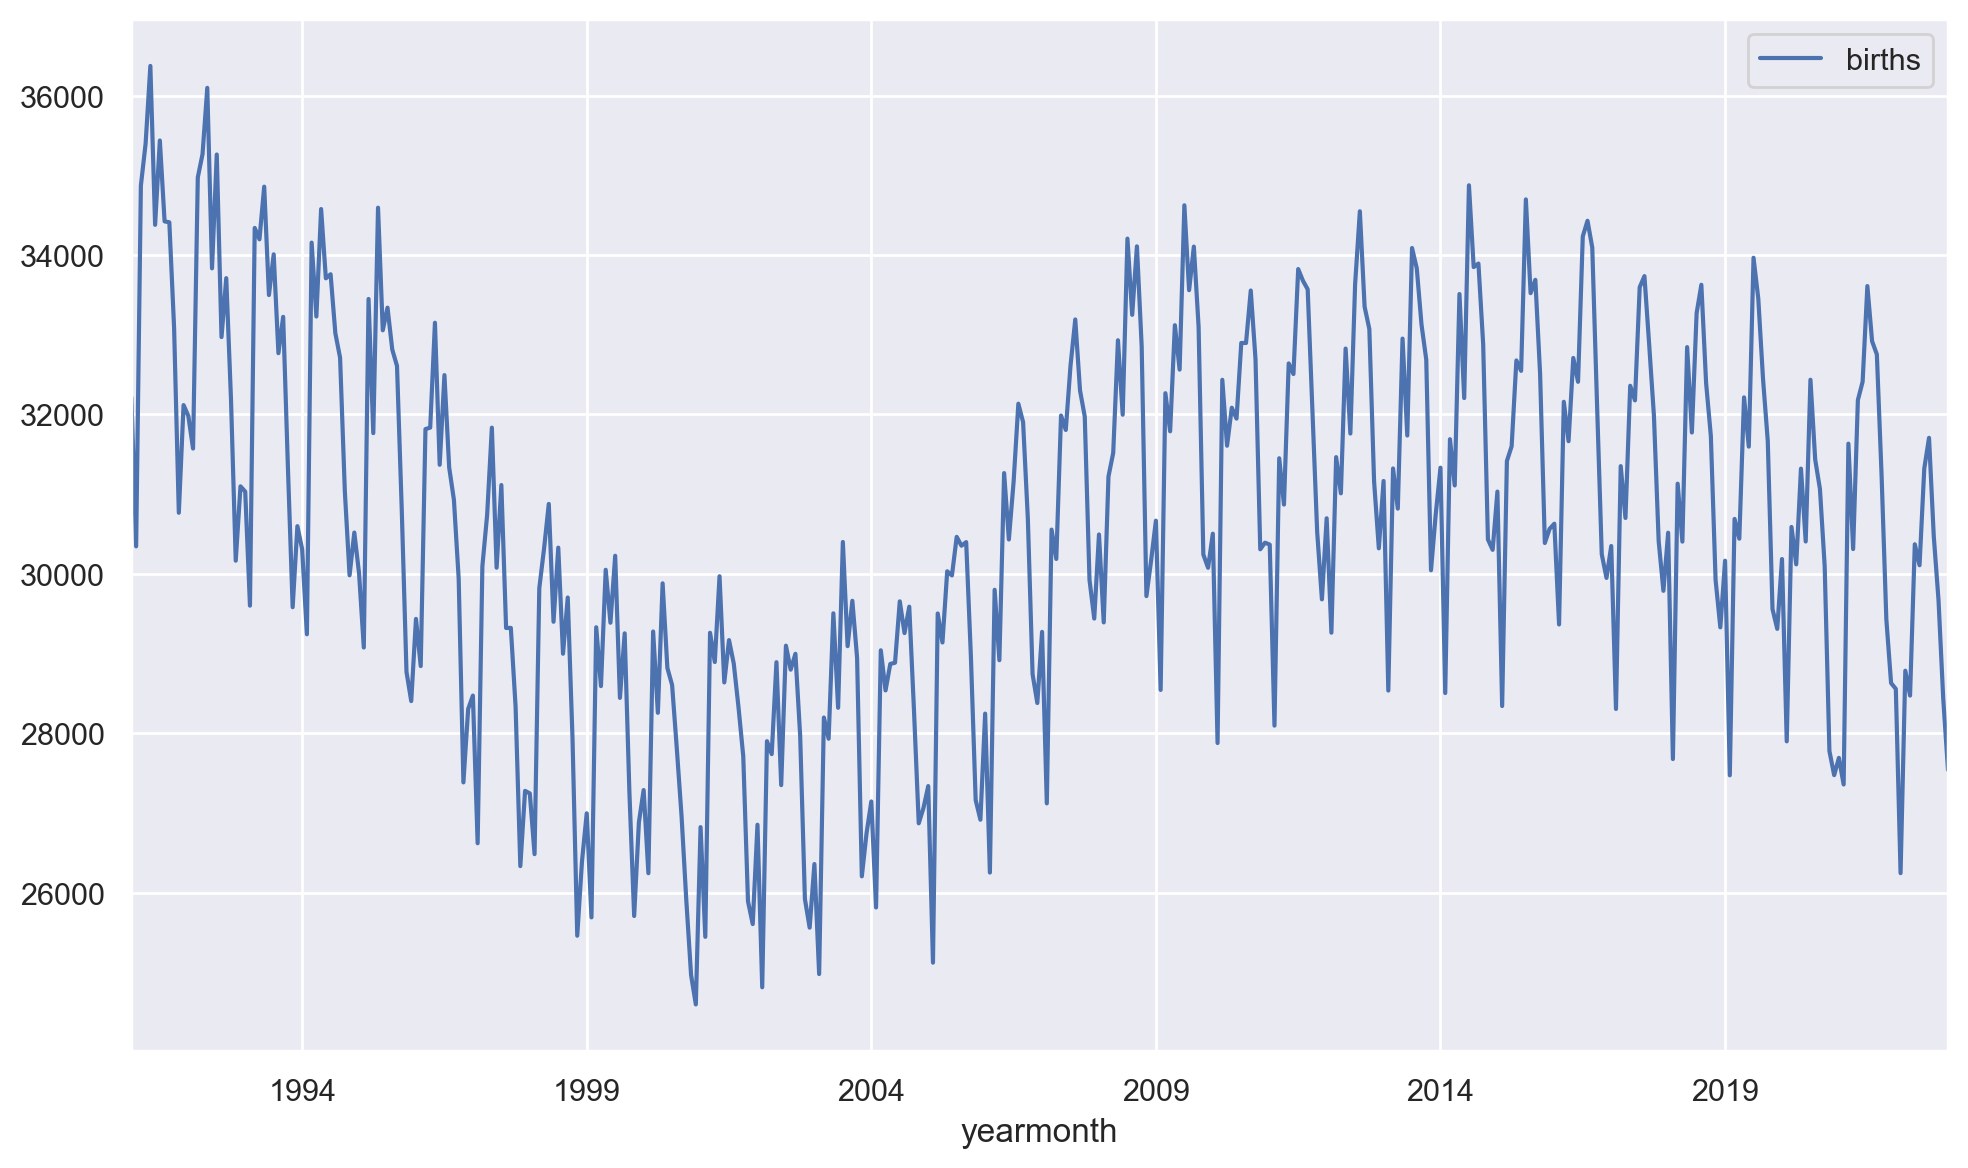

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('w')
clean_canada_births.plot(x='yearmonth', y='births', ax=ax)
fig.tight_layout()

### What does the monthly birth rate for Canadians look like?

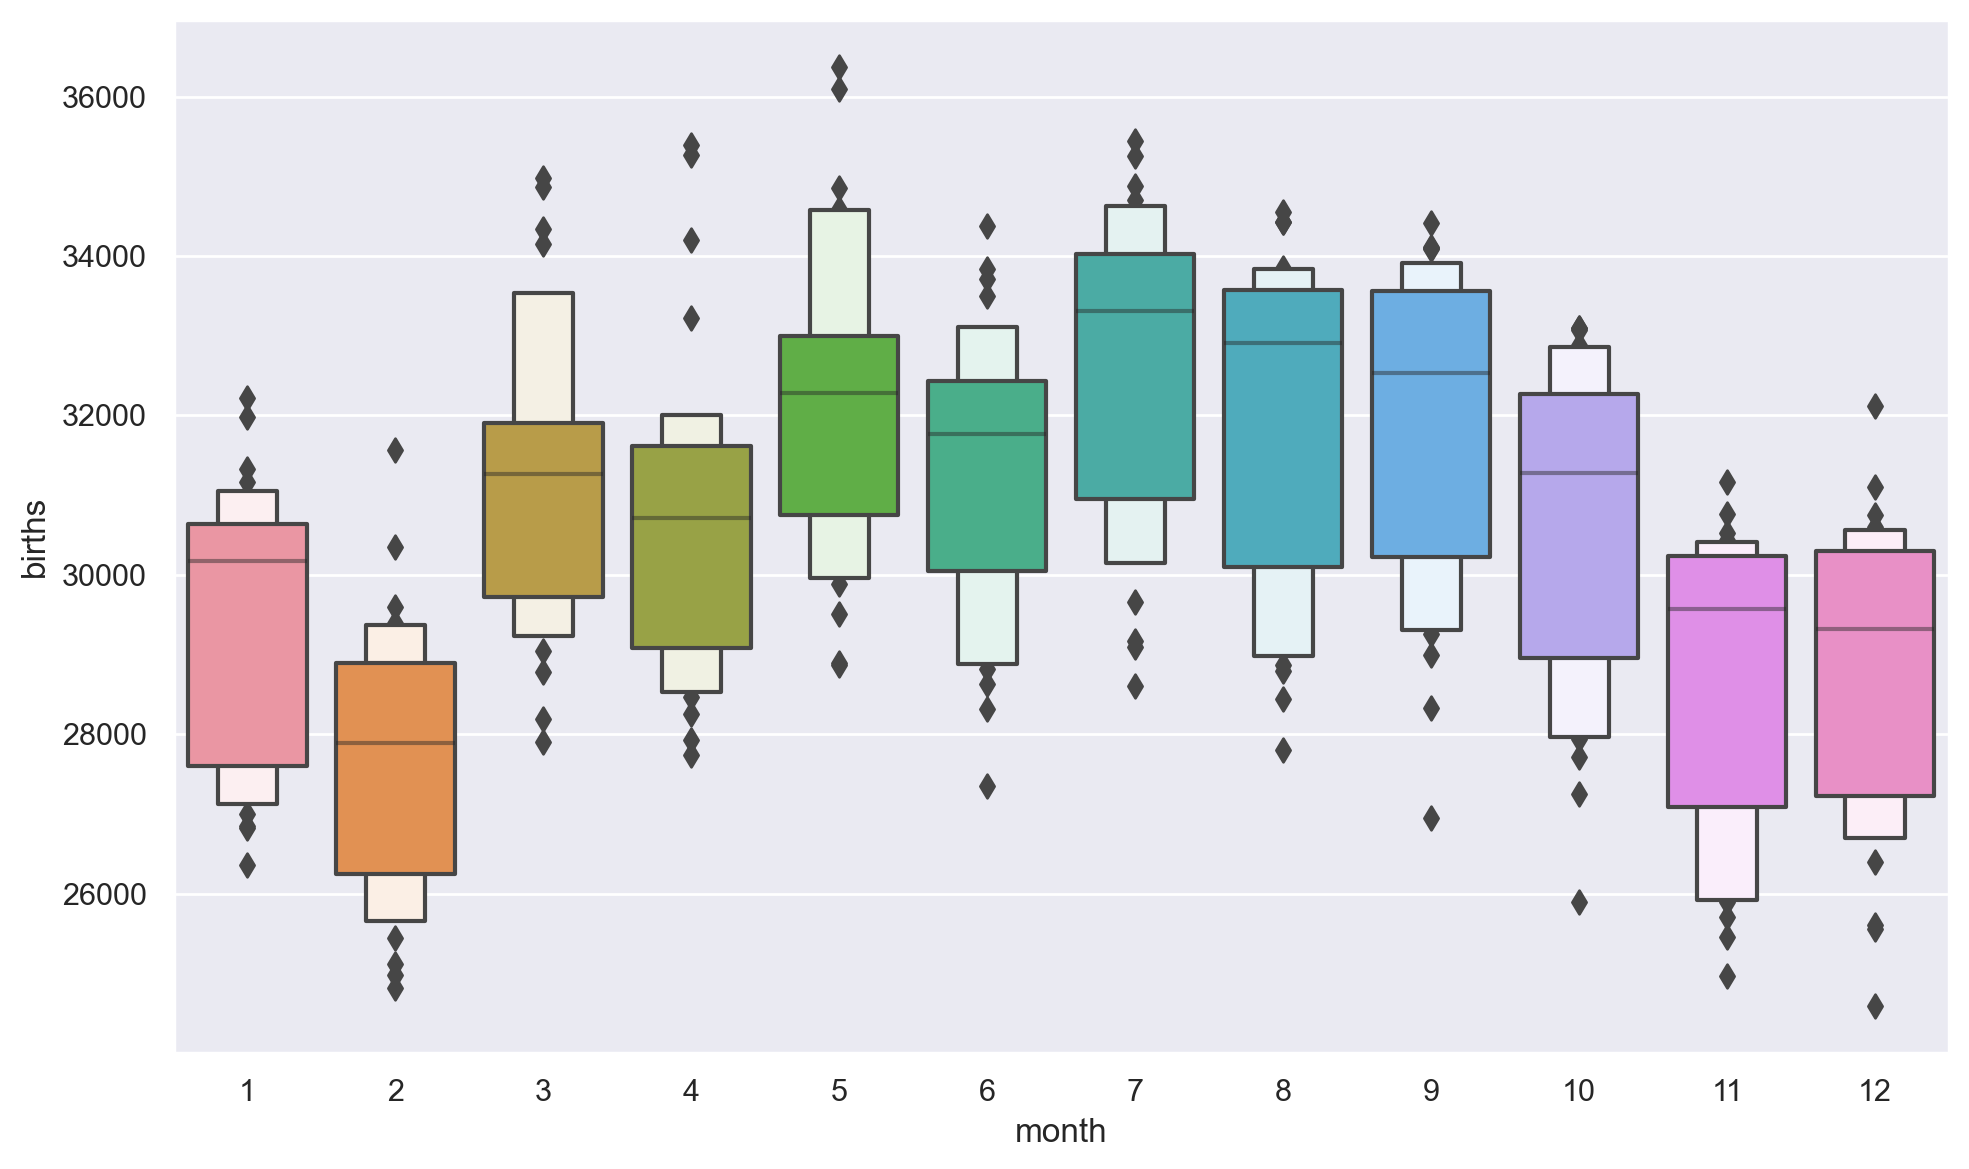

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('w')
sns.boxenplot(data=clean_canada_births, ax=ax, x='month', y='births')
fig.tight_layout()

### What does the monthly birth rate for NHL players look like?

In [ ]:
clean_nhl_player_births.head()

,player_id,first_name,last_name,birth_date,birth_city,birth_country,birth_state_province,birth_year,birth_month
0,8467867,Bryan,Adams,1977-03-20,Fort St. James,CAN,British Columbia,1977,3
1,8445176,Donald,Audette,1969-09-23,Laval,CAN,Quebec,1969,9
2,8460014,Eric,Bertrand,1975-04-16,St-Ephrem,CAN,Quebec,1975,4
3,8460510,Jason,Botterill,1976-05-19,Edmonton,CAN,Alberta,1976,5
4,8459596,Andrew,Brunette,1973-08-24,Sudbury,CAN,Ontario,1973,8


In [ ]:
g = clean_nhl_player_births.groupby(['birth_month']).count()['player_id']

In [ ]:
g = g / g.sum() * 100

In [ ]:
g.index -1

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='birth_month')

In [ ]:
g


birth_month
1     10.3375
2      9.6649
3      9.8419
4      9.3934
5      9.2400
6      8.1662
7      8.2134
8      7.1041
9      7.5407
10     7.3165
11     6.6203
12     6.5612
Name: player_id, dtype: float64

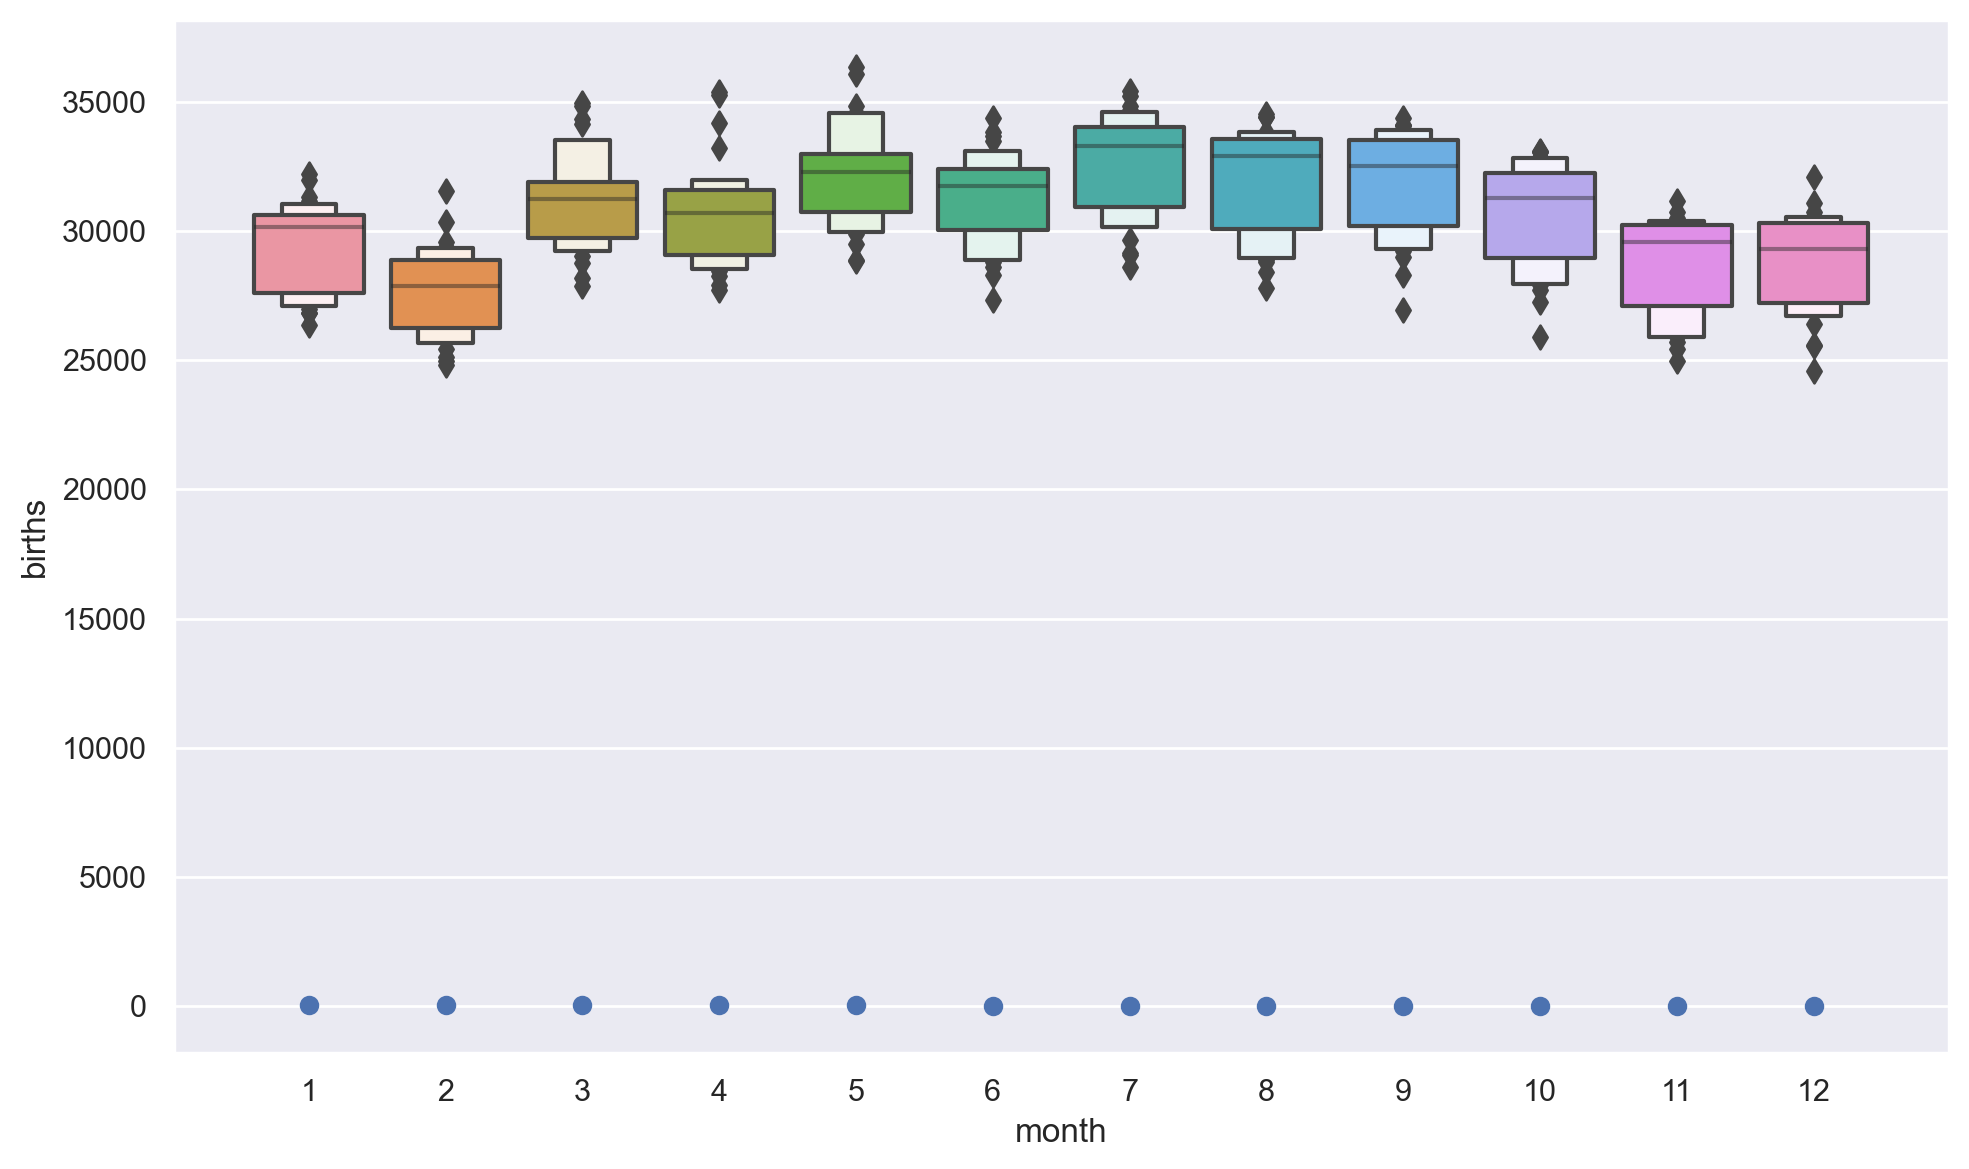

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('w')
sns.boxenplot(data=clean_canada_births, ax=ax, x='month', y='births')
ax.scatter(g.index-1, g)
fig.tight_layout()

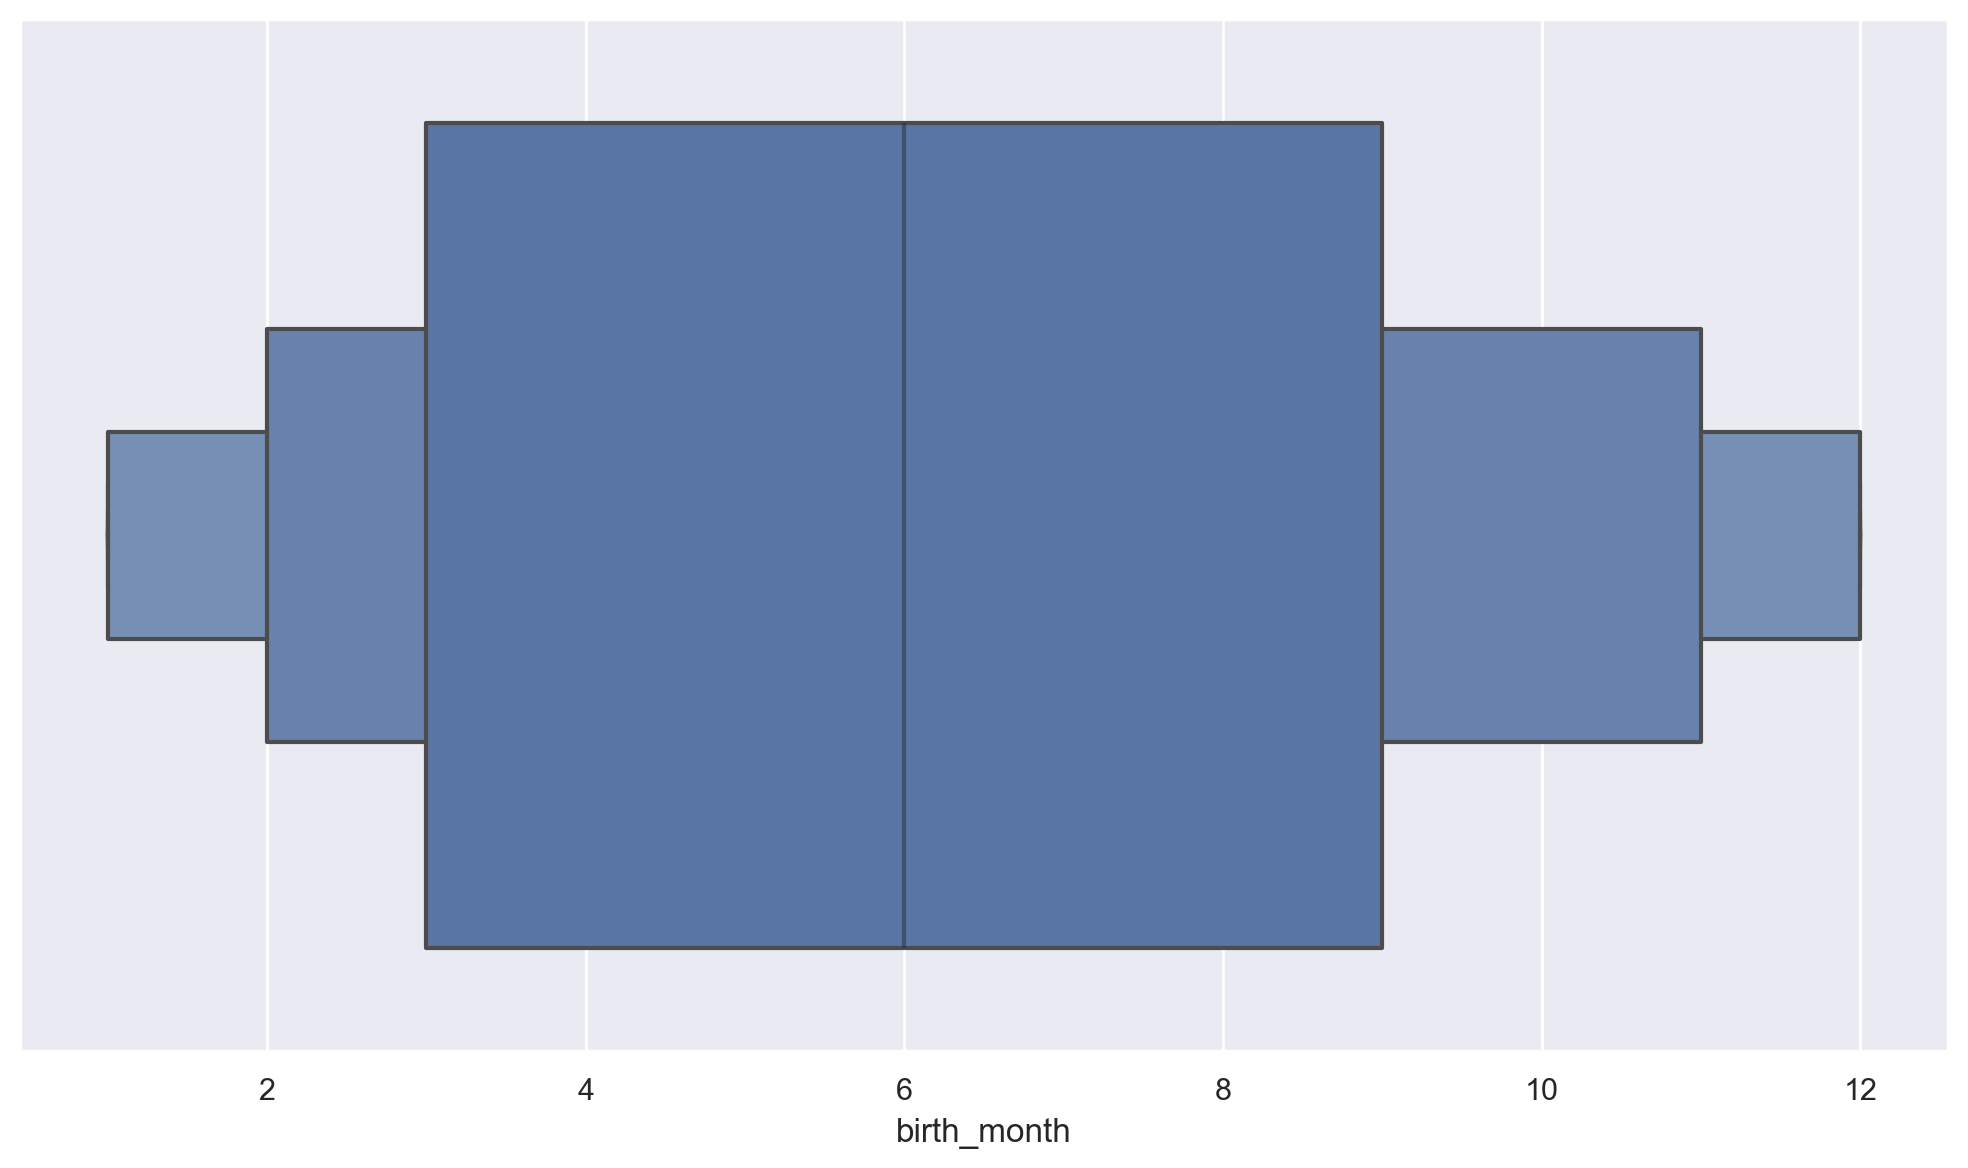

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('w')
sns.boxenplot(data=clean_nhl_player_births, ax=ax, x='birth_month')
fig.tight_layout()

## Questions

- Should I exclusively look at NHL players born in Canada?
- Should I weight the overall Canada birth rate based on NHL player density?

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()